<a href="https://colab.research.google.com/github/SyedsProjectPortfolio45/Black-Friday-Sales-Analysis/blob/main/BlackFriday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%time data = pd.read_csv("train_bf.csv")

data.shape

CPU times: user 29.4 ms, sys: 10.2 ms, total: 39.6 ms
Wall time: 43.2 ms


(45171, 12)

In [ ]:
data.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
15971,1002452,P00036842,M,46-50,7,B,0,0,1,14.0,16.0,11425.0
24549,1003796,P00254342,M,46-50,14,C,4+,1,5,11.0,NaN,7065.0
11878,1001778,P00279542,M,18-25,4,B,1,0,8,NaN,NaN,7917.0
22344,1003509,P00339842,M,18-25,4,A,0,0,1,14.0,15.0,15732.0
23037,1003610,P00040742,M,18-25,6,B,4+,0,1,5.0,NaN,11958.0
12781,1001921,P00359042,M,55+,12,C,2,0,2,8.0,14.0,12990.0
31158,1004765,P00210942,F,36-45,16,B,3,1,5,12.0,NaN,8877.0
31840,1004879,P00285342,M,26-35,3,A,2,0,5,8.0,NaN,8673.0
1841,1000300,P00157642,M,26-35,7,B,4+,1,1,14.0,16.0,11581.0
13487,1002011,P00014542,F,36-45,3,B,3,1,8,NaN,NaN,9980.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45171 entries, 0 to 45170
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     45171 non-null  int64  
 1   Product_ID                  45171 non-null  object 
 2   Gender                      45171 non-null  object 
 3   Age                         45171 non-null  object 
 4   Occupation                  45171 non-null  int64  
 5   City_Category               45171 non-null  object 
 6   Stay_In_Current_City_Years  45171 non-null  object 
 7   Marital_Status              45171 non-null  int64  
 8   Product_Category_1          45171 non-null  int64  
 9   Product_Category_2          31030 non-null  float64
 10  Product_Category_3          13786 non-null  float64
 11  Purchase                    45170 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.1+ MB


In [ ]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.517100e+04,45171.000000,45171.000000,45171.000000,31030.000000,13786.000000,45170.000000
mean,1.002686e+06,8.153882,0.408758,5.295787,9.868611,12.714058,9298.801616
std,1.830665e+03,6.571811,0.491610,3.719120,5.068817,4.114985,4950.247608
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.000921e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5869.000000
50%,1.002567e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8052.000000
75%,1.004271e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12037.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [ ]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [ ]:
data.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            14141
Product_Category_3            31385
Purchase                          1
dtype: int64

In [ ]:
data['Gender'].value_counts()

M    34117
F    11054
Name: Gender, dtype: int64

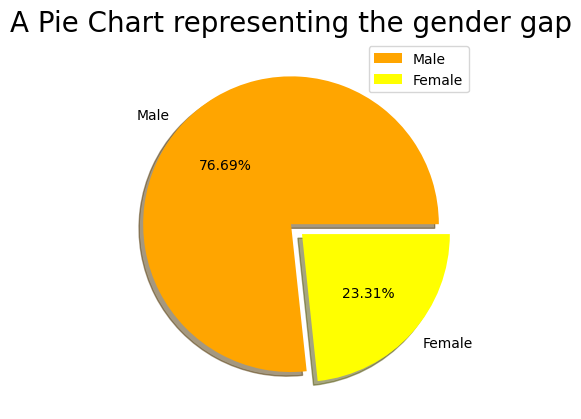

In [ ]:
size = [405380, 123197]
labels = ['Male', 'Female']
colors = ['orange', 'yellow']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
data.groupby(data.Gender).Purchase.max()

Gender
F    23941.0
M    23958.0
Name: Purchase, dtype: float64

In [ ]:
data.groupby(data.Gender).Purchase.min()

Gender
F    347.0
M    185.0
Name: Purchase, dtype: float64

In [ ]:
data[['Gender', 'Purchase']].groupby('Gender').mean()

,Purchase
Gender,
F,8776.204107
M,9468.109300


Text(0, 0.5, 'Count')

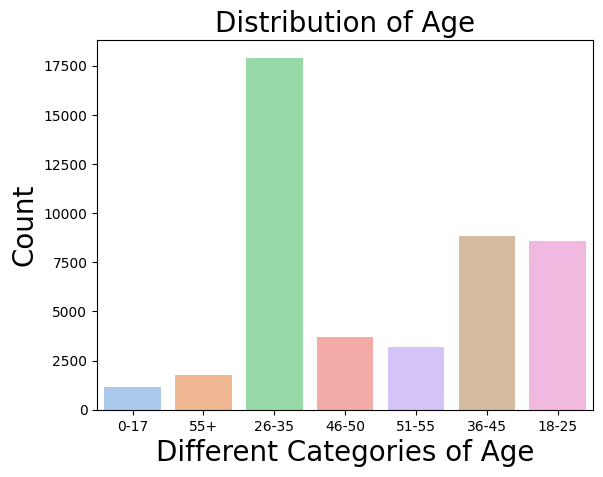

<Figure size 1300x800 with 0 Axes>

In [ ]:
ax=sns.countplot(x=data['Age'], palette='pastel')
plt.figure(figsize=(13,8))
ax.set_title(label='Distribution of Age', fontsize = 20)
ax.set_xlabel(xlabel='Different Categories of Age', fontsize = 20)
ax.set_ylabel(ylabel='Count', fontsize=20)

Text(0, 0.5, 'Count')

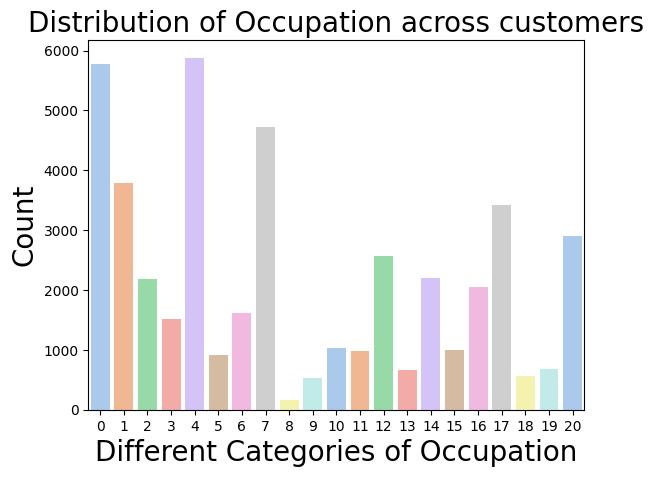

<Figure size 1300x800 with 0 Axes>

In [ ]:
ax=sns.countplot(x=data['Occupation'], palette='pastel')
plt.figure(figsize=(13,8))
ax.set_title(label='Distribution of Occupation across customers', fontsize = 20)
ax.set_xlabel(xlabel='Different Categories of Occupation', fontsize = 20)
ax.set_ylabel(ylabel='Count', fontsize=20)

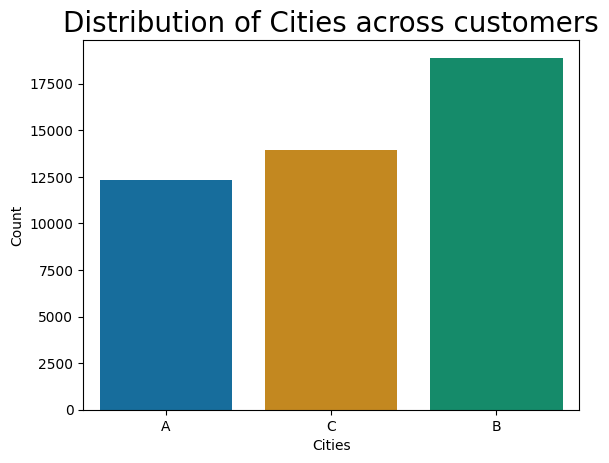

In [ ]:
sns.countplot(x=data['City_Category'], palette = 'colorblind')
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

In [ ]:
data[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


In [ ]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4,})

data['Stay_In_Current_City_Years'].value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

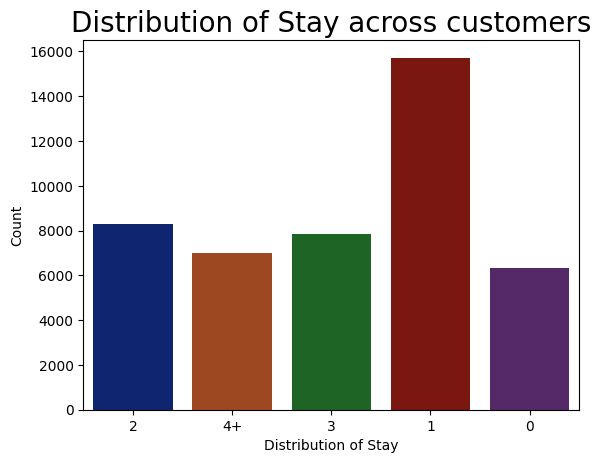

In [ ]:
sns.countplot(x=data['Stay_In_Current_City_Years'], palette = 'dark')
plt.title('Distribution of Stay across customers', fontsize = 20)
plt.xlabel('Distribution of Stay')
plt.ylabel('Count')
plt.show()

In [ ]:
data[['Stay_In_Current_City_Years', 'Purchase']].groupby('Stay_In_Current_City_Years').mean()

,Purchase
Stay_In_Current_City_Years,
0,9180.075123
1,9250.145923
2,9320.429810
3,9286.904119
4,9275.598872


In [ ]:
data['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

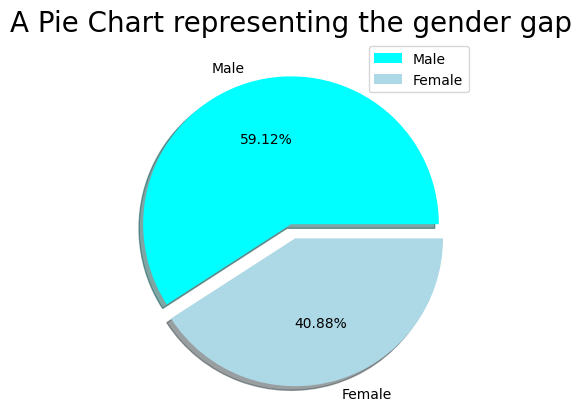

In [ ]:
size = [317817, 219760]
labels = ['Male', 'Female']
colors = ['cyan', 'lightblue']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
data[['Marital_Status', 'Purchase']].groupby('Marital_Status').mean()

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


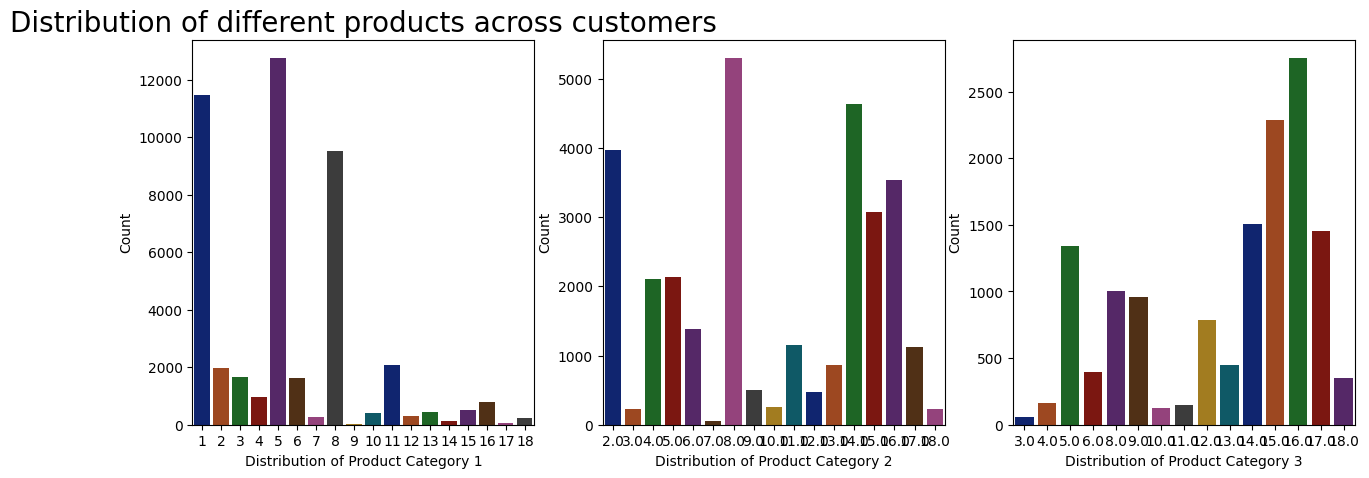

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(131)
sns.countplot(x=data['Product_Category_1'], palette = 'dark')
plt.title('Distribution of different products across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(132)
sns.countplot(x=data['Product_Category_2'], palette = 'dark')
#plt.title('Distribution of product category 2 across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(133)
sns.countplot(x=data['Product_Category_3'], palette = 'dark')
#plt.title('Distribution of product category 3 across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')


plt.show()

In [ ]:
data[['Product_Category_1', 'Purchase']].groupby('Product_Category_1').mean()

,Purchase
Product_Category_1,
1,13606.218596
2,11251.935384
3,10096.705734
4,2329.659491
5,6240.088178
6,15838.478550
7,16365.689600
8,7498.958078
9,15537.375610


<ipython-input-94-8503e572c0c6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Purchase'], color = 'purple', fit = norm)


The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


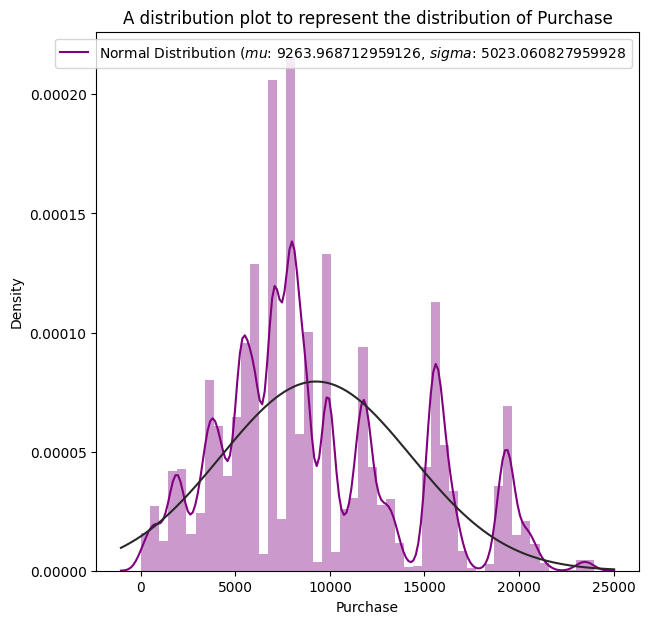

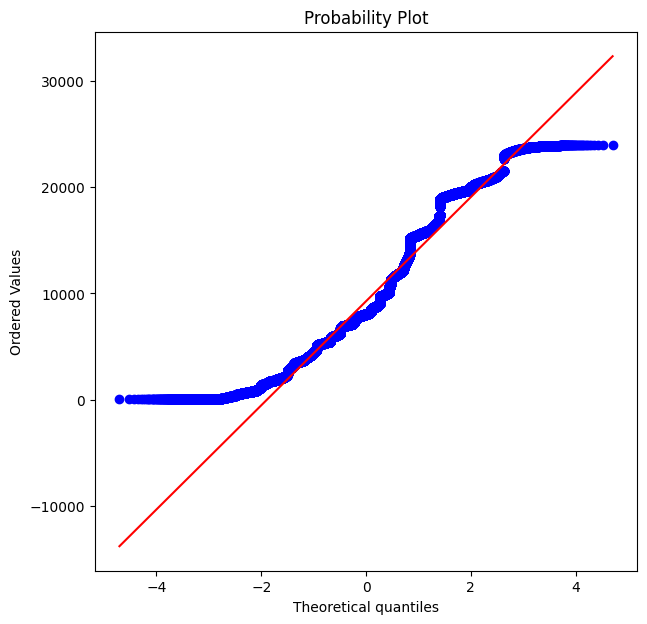

In [ ]:
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (7, 7)
sns.distplot(data['Purchase'], color = 'purple', fit = norm)

# fitting the target variable to the normal curve
mu, sigma = norm.fit(data['Purchase'])
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

# plotting the QQplot
stats.probplot(data['Purchase'], plot = plt)
plt.show()

In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
User_ID = data['User_ID']
Product_ID = data['Product_ID']

data = data.drop(['User_ID', 'Product_ID'], axis = 1)

# checking the new shape of data
data.shape

(550068, 10)

In [ ]:
data['Product_Category_2'].fillna(0, inplace = True)
data['Product_Category_3'].fillna(0, inplace = True)

data.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
data = pd.get_dummies(data)

# checking the shape of new dataset
data.shape

(550068, 19)

In [ ]:
data.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,10,2,0,3,0.0,0.0,8370,1,0,1,0,0,0,0,0,0,1,0,0
1,10,2,0,1,6.0,14.0,15200,1,0,1,0,0,0,0,0,0,1,0,0
2,10,2,0,12,0.0,0.0,1422,1,0,1,0,0,0,0,0,0,1,0,0
3,10,2,0,12,14.0,0.0,1057,1,0,1,0,0,0,0,0,0,1,0,0
4,16,4,0,8,0.0,0.0,7969,0,1,0,0,0,0,0,0,1,0,0,1


In [ ]:
y = data['Purchase']

# now removing the purchase column from the dataset
data = data.drop(['Purchase'], axis = 1)

x = data

# checking the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (550068, 18)
Shape of y:  (550068,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (385047, 18)
Shape of x_test:  (165021, 18)
Shape of y_train:  (385047,)
Shape of y_test:  (165021,)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4632.125289994404
R2 Score: 0.15364329307650648


In [ ]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4663.080544204063
R2 Score: 0.14229354476512635


In [ ]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Lasso()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4632.1360205001565
R2 Score: 0.15363937183281684


In [ ]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4663.080544204063
R2 Score: 0.14229354476512635


In [ ]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2925.1030882404293
R2 Score: 0.6624988962921547
